In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tic-tac-toe-endgame.csv')

In [3]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
Le_x = LabelEncoder()

In [10]:
df1 = df.apply(LabelEncoder().fit_transform)

In [11]:
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
953,1,2,2,2,1,1,1,2,2,0
954,1,2,1,2,2,1,2,1,2,0
955,1,2,1,2,1,2,2,1,2,0
956,1,2,1,1,2,2,2,1,2,0


In [12]:
df1.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A47C63C348>,
      dtype=object)

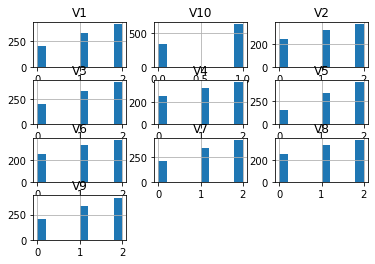

In [14]:
df1.hist()

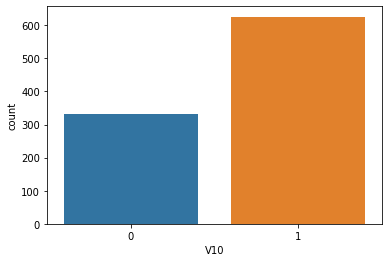

In [15]:
sns.countplot(df1['V10'])

In [16]:
x = df1.drop(['V10'],axis=1)

In [17]:
y = df1['V10']

In [18]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,2,2,2,2,1,1,2,1,1
1,2,2,2,2,1,1,1,2,1
2,2,2,2,2,1,1,1,1,2
3,2,2,2,2,1,1,1,0,0
4,2,2,2,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
953,1,2,2,2,1,1,1,2,2
954,1,2,1,2,2,1,2,1,2
955,1,2,1,2,1,2,2,1,2
956,1,2,1,1,2,2,2,1,2


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
953    0
954    0
955    0
956    0
957    0
Name: V10, Length: 958, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3)

In [23]:
xtrain

,V1,V2,V3,V4,V5,V6,V7,V8,V9
444,1,0,2,1,0,1,2,2,2
917,0,1,2,2,1,0,2,1,0
559,0,1,2,0,1,1,2,2,2
777,1,2,1,2,1,2,1,0,2
921,0,1,1,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...
595,0,0,2,1,2,0,2,1,0
807,1,1,2,2,1,0,2,1,2
841,1,1,1,0,2,0,2,2,0
323,1,2,1,2,2,2,0,0,1


In [25]:
ytrain

444    1
917    0
559    1
777    0
921    0
      ..
595    1
807    0
841    0
323    1
45     1
Name: V10, Length: 670, dtype: int32

In [26]:
xtest

,V1,V2,V3,V4,V5,V6,V7,V8,V9
7,2,2,2,2,1,0,1,0,1
638,2,2,1,2,0,1,1,2,1
630,2,2,1,2,1,2,1,0,1
926,0,1,0,2,1,0,2,1,2
275,2,0,0,2,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...
803,1,1,2,2,1,2,2,1,0
231,2,0,2,1,2,0,2,1,1
837,1,1,1,0,2,2,2,0,0
400,1,1,2,0,2,0,2,0,0


In [27]:
ytest

7      1
638    0
630    0
926    0
275    1
      ..
803    0
231    1
837    0
400    1
79     1
Name: V10, Length: 288, dtype: int32

In [28]:
dt = DecisionTreeClassifier()

In [29]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
dt.score(xtest,ytest)

0.875

In [34]:
xinput = np.array([2,0,0,2,2,1,2,1,1])

In [36]:
y_predict = dt.predict([xinput])

In [37]:
y_predict

array([1])